In [1]:
from imutils import paths
from pathlib import Path
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image as image_utils
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

import sys
sys.path.append('/Users/ilyarudyak/projects/cs230_project_keras/skin_lesion')
from utils import Params

from data_gen import SkinLesionDataGen

%matplotlib inline
%load_ext autoreload
%autoreload 2

Let's check that our generators work.

In [2]:
params = Params('../experiments/base_model/params.json')

In [3]:
params.dict

{'batch_size': 8, 'target_size': [224, 224], 'seed': 42}

### `SkinLesionDataGen` class

In [4]:
sldg = SkinLesionDataGen(params=params)

In [5]:
sldg.params.dict

{'batch_size': 8, 'target_size': [224, 224], 'seed': 42}

In [6]:
sldg.batch_size, sldg.target_size, sldg.seed

(8, [224, 224], 42)

In [7]:
sldg.image_color_mode, sldg.mask_color_mode

('rgb', 'grayscale')

In [8]:
sldg.image_classes, sldg.mask_classes

(['images'], ['masks'])

In [9]:
sldg.train_dir, sldg.val_dir

(PosixPath('/Users/ilyarudyak/data/isic_2018/train'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/val'))

### train generator

In [10]:
train_gen = sldg.get_train_gen()

In [11]:
image_batch, mask_batch = next(iter(train_gen))

Found 1556 images belonging to 1 classes.
Found 1556 images belonging to 1 classes.


In [12]:
image_batch.shape, mask_batch.shape

((8, 224, 224, 3), (8, 224, 224, 1))

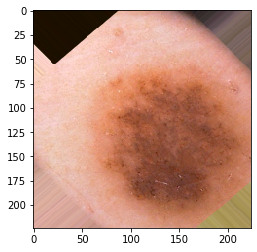

In [21]:
plt.imshow(image_batch[1]);

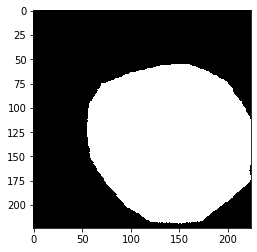

In [22]:
plt.imshow(mask_batch[1].reshape(224, 224), cmap='gray');